<a href="https://colab.research.google.com/github/khuramgill/Ai-Labs/blob/main/2022cs_48_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Analysis Assignment

## Objective
The goal of this assignment is to assess your ability to perform text analysis using Python libraries, focusing on regular expressions and other text processing techniques.

## Dataset
For this assignment, we will use the [Twitter Sentiment Analysis Dataset](https://www.kaggle.com/kazanova/sentiment140).  

Note: This lab will not work on older versions of Python; make sure to work on Googe colab

**This assignment should be completed and submitted by 11:59 PM PST on Friday, Oct 25th, 2024**

## Step 1: Environment Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import zipfile
import requests

# Download NLTK resources if needed
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Step 2: Load the Dataset from URL


*   First, we need to download and extract the dataset




In [2]:
# Download and extract the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
response = requests.get(url)

# Save the zip file locally
with open('smsspamcollection.zip', 'wb') as file:
    file.write(response.content)

# Extract the zip file
with zipfile.ZipFile('smsspamcollection.zip', 'r') as zip_ref:
    zip_ref.extractall()

# Load the dataset into a DataFrame (the file name is 'SMSSpamCollection')
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Preview the data
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


## Question 1: Data Overview
Display the shape of the dataset and check for any missing values.

In [3]:
#shape of the dataset
print(f"Dataset Shape: {df.shape}")
#check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values: \n{missing_values}")


Dataset Shape: (5572, 2)
Missing Values: 
label      0
message    0
dtype: int64


## Question 2: Data Cleaning
Write a function to clean the text data by removing URLs and converting text to lowercase.

In [4]:
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = text.lower()
    return text


df['cleaned_message'] = df['message'].apply(clean_text)
print(df[['message', 'cleaned_message']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                     cleaned_message  
0  go until jurong point, crazy.. available only ...  
1                      ok lar... joking wif u oni...  
2  free entry in 2 a wkly comp to win fa cup fina...  
3  u dun say so early hor... u c already then say...  
4  nah i don't think he goes to usf, he lives aro...  


### Question 3: Tokenization
Tokenize the cleaned text into words and display the first five tokens from one entry.

In [7]:
# Tokenize text
df['tokenized_message'] = df['cleaned_message'].apply(word_tokenize)

# Display the first five tokens
print(f"First five tokens: {df['tokenized_message'].iloc[0][:5]}")


First five tokens: ['go', 'until', 'jurong', 'point', ',']


### Question 4: Removing Stop Words
Remove common stop words from the tokenized words and display the remaining words for one entry.

In [8]:
stop_words = set(stopwords.words('english'))

def remove_stop_words(tokens):
    return [word for word in tokens if word not in stop_words]

# Apply the function to remove stop words
df['filtered_message'] = df['tokenized_message'].apply(remove_stop_words)

# Display the remaining words for one entry
print(f"Remaining words: {df['filtered_message'].iloc[0]}")


Remaining words: ['go', 'jurong', 'point', ',', 'crazy', '..', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'cine', 'got', 'amore', 'wat', '...']


### Question 5: Word Frequency Distribution
1. Create a frequency distribution of words in the cleaned text and plot it using Matplotlib.
2. Focus on displaying only the top 10 most common words.

Top 10 most common words: [('.', 4726), (',', 1934), ('?', 1549), ('!', 1396), ('...', 1146), ('u', 1136), ('&', 922), (';', 768), (':', 703), ('..', 697)]


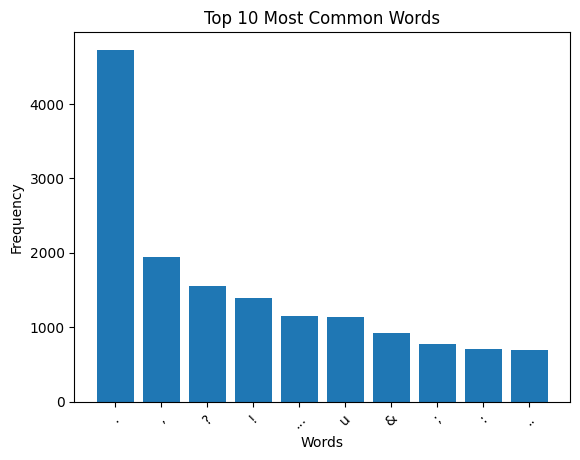

In [9]:
from collections import Counter
all_words = [word for tokens in df['filtered_message'] for word in tokens]
word_freq = Counter(all_words)

common_words = word_freq.most_common(10)
print("Top 10 most common words:", common_words)
words, counts = zip(*common_words)
plt.bar(words, counts)
plt.title('Top 10 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


### Question 6: Label Distribution
1. Analyze the distribution of spam and ham messages in the dataset. Create a bar plot to visualize the counts of each label.

Label Distribution: 
label
ham     4825
spam     747
Name: count, dtype: int64


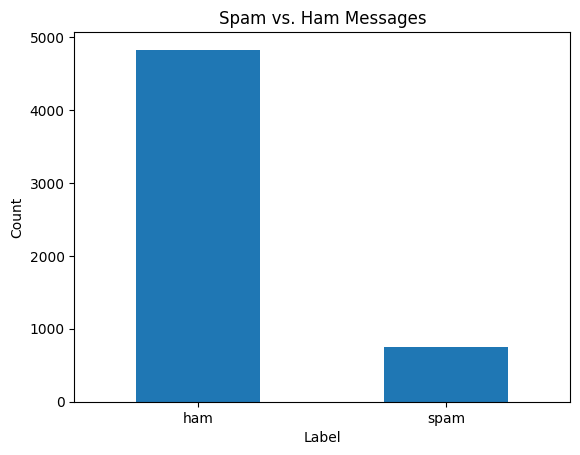

In [10]:
label_distribution = df['label'].value_counts()
print(f"Label Distribution: \n{label_distribution}")
label_distribution.plot(kind='bar')
plt.title('Spam vs. Ham Messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


### Question 7: Length of Messages
1. Calculate the length of each message (in terms of character count) and add this as a new column to the DataFrame. Then, visualize the distribution of message lengths using a histogram.

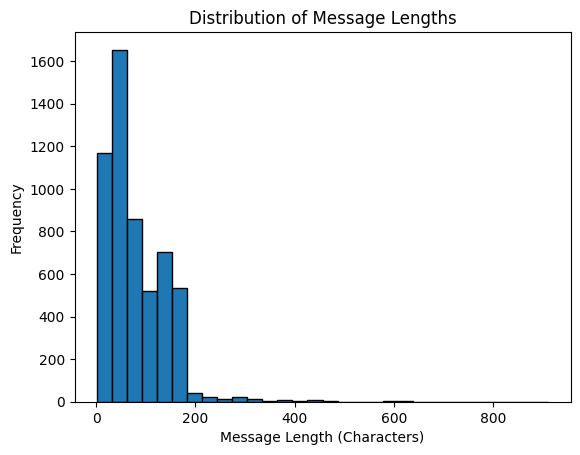

In [11]:
df['message_length'] = df['message'].apply(len)
plt.hist(df['message_length'], bins=30, edgecolor='k')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length (Characters)')
plt.ylabel('Frequency')
plt.show()


### Question 8: Most Common Words in Spam vs. Ham
1. Identify and display the most common words in spam messages compared to ham messages. Use a simple frequency count for this analysis

In [13]:
spam_messages = df[df['label'] == 'spam']
ham_messages = df[df['label'] == 'ham']

spam_words = [word for tokens in spam_messages['filtered_message'] for word in tokens]
ham_words = [word for tokens in ham_messages['filtered_message'] for word in tokens]
spam_word_freq = Counter(spam_words)
ham_word_freq = Counter(ham_words)

spam_common = spam_word_freq.most_common(10)
ham_common = ham_word_freq.most_common(10)

print(f"Top 10 words in spam messages: {spam_common}")
print(f"Top 10 words in ham messages: {ham_common}")


Top 10 words in spam messages: [('.', 912), ('!', 544), (',', 374), ('call', 346), ('free', 219), ('&', 178), ('2', 174), ('?', 174), ('txt', 156), (':', 144)]
Top 10 words in ham messages: [('.', 3814), (',', 1560), ('?', 1375), ('...', 1139), ('u', 994), ('!', 852), (';', 766), ('&', 744), ('..', 685), (':', 559)]


### Question 9: Word Cloud Visualization
1. Create a word cloud for the cleaned text of all messages. This visualization will help you see which words are most prominent in the dataset.

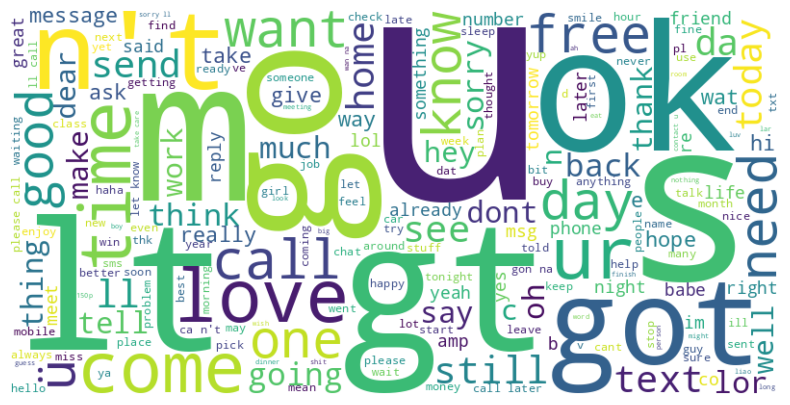

In [14]:
from wordcloud import WordCloud
all_cleaned_text = ' '.join([' '.join(tokens) for tokens in df['filtered_message']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Question 10: Sentiment Analysis (Basic)
1. Perform a basic sentiment analysis by checking for specific keywords (e.g., "free", "win", "call", etc.) in spam messages.
2. Count how many spam messages contain at least one of these keywords.

In [15]:
keywords = ['free', 'win', 'call', 'urgent', 'prize']

# Create a new column to indicate whether each message contains a keyword
spam_messages['contains_keyword'] = spam_messages['cleaned_message'].apply(
    lambda msg: any(keyword in msg for keyword in keywords)
)

keyword_count = spam_messages['contains_keyword'].sum()
print(f"Number of spam messages containing keywords: {keyword_count}")


Number of spam messages containing keywords: 534


<ipython-input-15-f37791c610d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_messages['contains_keyword'] = spam_messages['cleaned_message'].apply(


### Reflection on Findings:
1. Reflect on what you learned from this assignment.
2. Discuss any insights gained from analyzing spam versus ham messages, including patterns you observed or challenges you faced during your analysis.

In [ ]:
#answer here

### Submission
1. Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.  
2. name your noteboob with your Roll number(e.g 2022cs_01_assignment2)
3. Upload your notebook and make sure to turn in before dealine.